In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# **Dummy Classifier**

In [ ]:
#DUMMY_CLASSIFIER
''''
import pandas as pd
import numpy as np
df = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
X = df.drop("Rating", axis=1)
y = df['Rating']

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

dummy = DummyClassifier(random_state = 42)

dummy_params = {'strategy':["most_frequent", "prior", "stratified"]}

grid_dummy = GridSearchCV(dummy,dummy_params, cv = 3)

model = grid_dummy.fit(X,y)

X_test = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
y_pred = model.predict(X_test)

'''

'\'\nimport pandas as pd\nimport numpy as np\ndf = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")\nX = df.drop("Rating", axis=1)\ny = df[\'Rating\']\n\nfrom sklearn.dummy import DummyClassifier\nfrom sklearn.model_selection import GridSearchCV\n\ndummy = DummyClassifier(random_state = 42)\n\ndummy_params = {\'strategy\':["most_frequent", "prior", "stratified"]}\n\ngrid_dummy = GridSearchCV(dummy,dummy_params, cv = 3)\n\nmodel = grid_dummy.fit(X,y)\n\nX_test = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")\ny_pred = model.predict(X_test)\n\n'

# **Data Loading**

*Loading Train data*

In [ ]:
#This is a Categorical data and will be using categorical model training tools to predict the ratings.
#/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv

import pandas as pd
import numpy as np

#importing the train dataset
df = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

df.shape


(13636, 15)

# **Exploratory Data Analysis**

In [ ]:
df.head(2)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...


From here, it can be observed that the columns ***RecipeName*** and ***Recipe_Review*** contains useful textual data and can be further broken down into numerical values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [ ]:
df.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

* It can be seen that Recipe_Review has 2 NULL values. Out of 13636 values, only 2 NULL values (0.015%), filling it manually won't affect the distribution of data

* Let's fill the NULL values
* It is necessary to fill the NULL values (specifically in the text column) as otherwise further transformations won't take place if empty.

In [ ]:
df = df.fillna("very good")
df.isna().sum() #0 NULL Values now

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [ ]:
df.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [ ]:
df.shape

(13636, 15)

**Top 32 Recipe Numbers in Descending order**

* Have considered 32% of the total recepies as these 32% receipes contributes to more than 50% of food ratings.

In [ ]:
group = df.groupby(['RecipeName','Rating']).size().unstack(fill_value=0)

group['total count'] = group.sum(axis=1)

mf = group.sort_values(by = 'total count',ascending = False).head(32)

mf

Rating,0,1,2,3,4,5,total count
RecipeName,,,,,,,
Cheeseburger Soup,14,7,7,17,55,453,553
Creamy White Chili,36,6,1,10,35,395,483
Best Ever Banana Bread,17,4,5,7,19,320,372
Enchilada Casser-Ole!,46,1,6,12,35,213,313
Basic Homemade Bread,51,5,4,5,23,219,307
Favorite Chicken Potpie,23,0,3,7,22,248,303
Flavorful Chicken Fajitas,17,1,1,2,12,241,274
Cauliflower Soup,11,1,5,7,26,206,256
Zucchini Pizza Casserole,7,4,1,1,30,208,251


In [ ]:
print('top 32 food recipes which is 32% of total entry contributes to',round(((553+483+372+313+307+303+274+256+251+249+211+208+204+189+170+169+165+163+161+159+155+150+148+145+143+141+140+140+139+136+135+135)/len(df['Rating']))*100,2),'% of total ratings contribution')

top 32 food recipes which is 32% of total entry contributes to 50.36 % of total ratings contribution


* Have taken top 32 food recipes only as they contribute to more than 50% total ratings contribution
* A business focuses on it's top most SKUs which generate more revenue or services or in this case ratings. These top 32% of recipes alone contributes more than 50% in total ratings

Top 5 foods are -
* Cheese Burger Soup
* Creamy White Chilli
* Best ever Banana Bread
* Enchilada Casser-Ole!
* Basic Homemade Bread

These 5 top recipes alone contributes to 14.8% of rating

# **Correlation Analysis**

* Hereby checking if there are any specific parameters that might have a strong positive or negative correlation

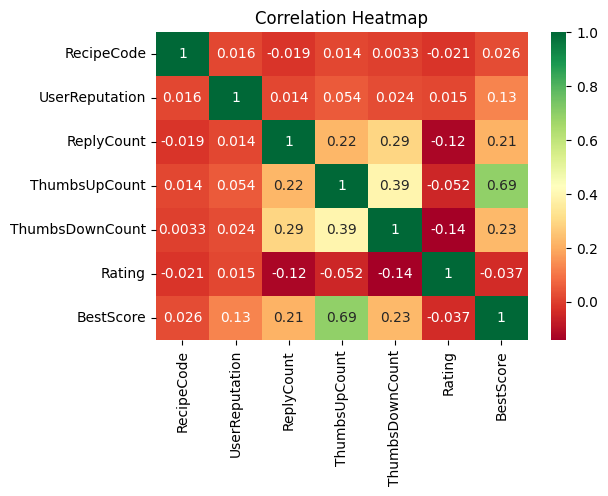

In [ ]:
#selecting specific numeric columns to identify if there exist any Correlation
corr = df.iloc[:,[2,7,9,10,11,12,13]]

correlation_matrix = corr.corr() #Correlation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()


* From the above correlation heatmap, we can say that "Rating" (which is our output variable) does not have a correlation with any of the variable.
* Although, "BestScore" and "ThumbsUpCount" are definitely correlated by 69%

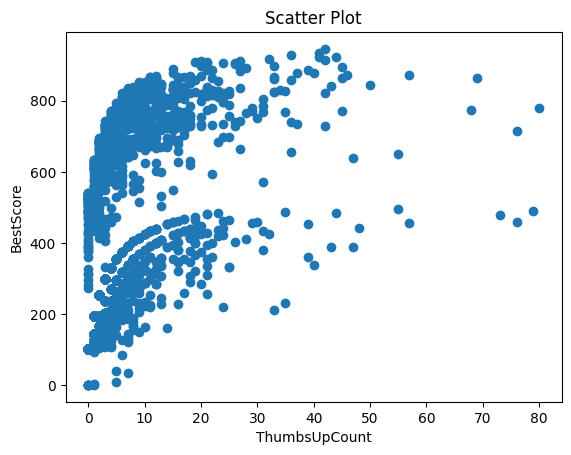

In [ ]:
#BestScore and ThumbsUpCounts are 69% correlated, let's see them in a scatter plot
import matplotlib.pyplot as plt
x = df['ThumbsUpCount']
y = df['BestScore']
plt.scatter(x,y)
plt.xlabel('ThumbsUpCount')
plt.ylabel('BestScore')
plt.title('Scatter Plot')
plt.show()

It can be inferred that both the x and y entities have a non-linear relation with each other

# **Pairplot**

Using the Pairplot to --
* Identify relationship between numerical entities using Scatter Plot
* Identify the range of values for a given parameter

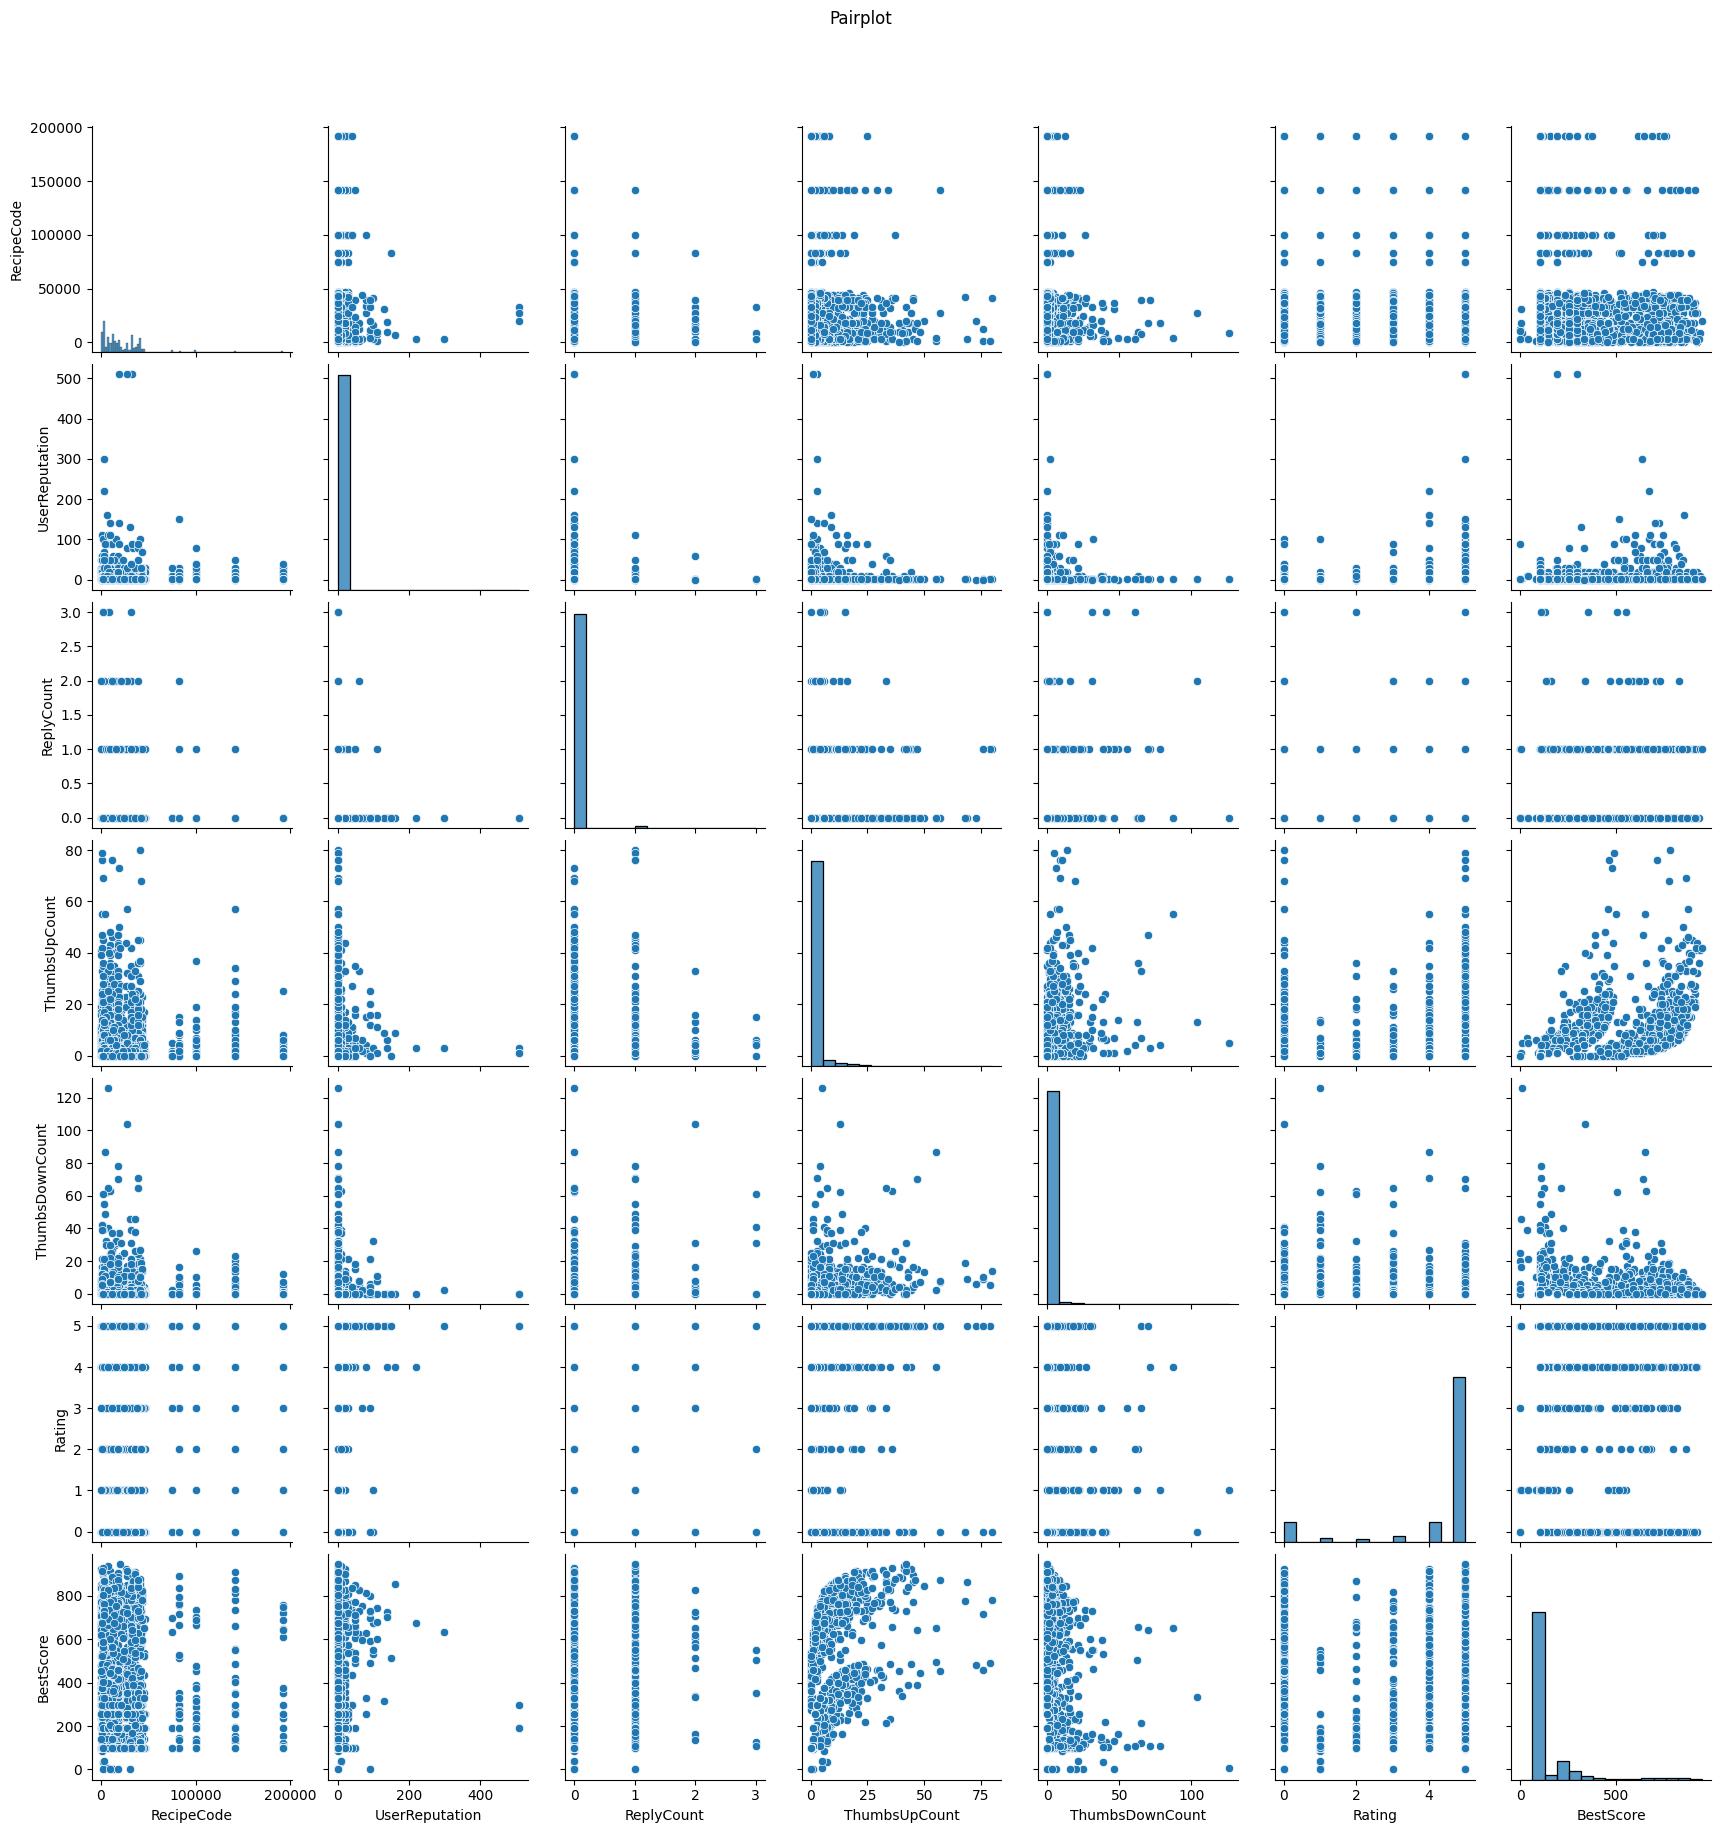

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
pp = sns.pairplot(corr)
pp.fig.suptitle('Pairplot', y=1.05) #y makes sure that the title of pairplot moves y length above the chart
plt.show()

In [ ]:
a = corr['Rating'].value_counts() #Getting a count of Ratings

# **Pie Chart**

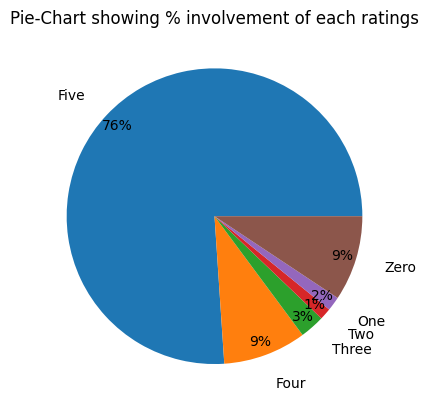

In [ ]:
five = a[5]/len(corr['Rating'])
four = a[4]/len(corr['Rating'])
three = a[3]/len(corr['Rating'])
two = a[2]/len(corr['Rating'])
one = a[1]/len(corr['Rating'])
zero = a[0]/len(corr['Rating'])

values = np.array([five,four,three,two,one,zero])
labels = ['Five','Four','Three','Two','One','Zero']

plt.pie(values, labels = labels, autopct='%1.0f%%',pctdistance=0.9, labeldistance=1.2)
plt.title('Pie-Chart showing % involvement of each ratings')
plt.show()

Out of all the ratings --
* rating 5 is given by 76% of users
* rating 4 is given by 9% of users
* rating 3 is given by 3% of users
* rating 2 is given by 1% of users
* rating 1 is gven by 2% of users
* rating 0 is given by 9% of users

This information will be used to calculate the Net Promoter Score (NPS)

# **Bar Chart**

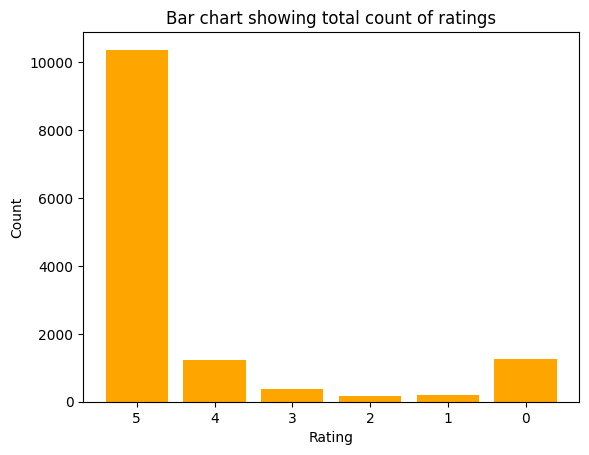

In [ ]:
rating = ['5','4','3','2','1','0']
count = [a[5],a[4],a[3],a[2],a[1],a[0]]
plt.bar(rating,count,color = 'orange')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Bar chart showing total count of ratings')
plt.show()

This bar chart and Pie-Chart clearly shows class imbalance. While Rating 5 alone is 76% and other ratings are not even 10%. Rating 5 is clearly an outlier and creates bias in the dataset.

# **Net Promoter Score**

**Net Promoter Score (NPS) is a metric used by businesses to identify how likely is the customer going to recommend a service/product.**

*NPS = %promoters - %detractors*

while,

promoters = Customers who are likely to recommend (Rating > 3)

passives = Neutral recommendation (Rating 3)

detractors = less likely to recommend (Rating < 3)

In [ ]:
promoters = (a[5]+a[4])/len(corr['Rating']) #identifying promoters i.e. with rating 4 and 5
passives = a[3]/len(corr['Rating']) #identifying passives i.e. with rating 3
detractors = (a[2]+a[1]+a[0])/len(corr['Rating']) #identifying detractors i.e. with ratings less than 3

NPS = round((promoters - detractors)*100,2) # %promoters - %detractors

print("Net Promoter Score is ",NPS,"%")


Net Promoter Score is  73.01 %


Impying that 73.01% customers are likely to recommend a good rating.

# **Data Split & Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13636 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [ ]:
#X_train1 = df.drop(columns = [])

In [ ]:
#dropping columns with textual data and taking the numeric columns

X_train_categorical = df.iloc[:,[0,1,2]] #keeping only categorical columns --> ID, RecipeNumber and RecipeCode
X_train_num = df.iloc[:,[7,9,10,11,13]] #Keeping numerical values --> UserReputation, ReplyCount, ThumbsUpCount, ThumbsDownCount, BestScore
X_train_str = df.iloc[:,[14]]

y_train1 = df['Rating']


In [ ]:
'''
from sklearn.feature_selection import SelectKBest, f_classif
kbest = SelectKBest(score_func = f_classif, k = 8)
df_new = kbest.fit_transform(X_train2,y_train1)
'''

'\nfrom sklearn.feature_selection import SelectKBest, f_classif\nkbest = SelectKBest(score_func = f_classif, k = 8)\ndf_new = kbest.fit_transform(X_train2,y_train1)\n'

_Had tried using KBest feature selection technique on numerical columns to get the best output mainly due to class imbalance but it didn't worked_

In [ ]:
df['Rating'].value_counts() #Getting the count of individual ratings

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

In [ ]:
df['Rating'].describe()

count    13636.000000
mean         4.288721
std          1.544839
min          0.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [ ]:
X_train_categorical.head(2) #Have considered ID, RecipeNumber and RecipeCode as CATEGORICAL Data

,ID,RecipeNumber,RecipeCode
0,70,71,12259
1,72,88,8202


In [ ]:
X_train_num.head(2)

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
0,20,0,0,0,100
1,1,0,0,1,100


**Due to class imbalance, applying SMOTE (Synthetic Minority Oversampling Technique)**

In [ ]:
'''
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train_num, y_train2 = sm.fit_resample(X_train_num, y_train2.ravel())
'''

'\nfrom imblearn.over_sampling import SMOTE\n\nsm = SMOTE(random_state = 42) \nX_train_num, y_train2 = sm.fit_resample(X_train_num, y_train2.ravel()) \n'

_Had tried to use SMOTE technique to manage class imbalance occurring in Rating column but it didn't worked out_

In [ ]:
'''
y_train1 = pd.DataFrame(data = y_train2, columns = ['Rating'])
y_train1.value_counts()
'''

"\ny_train1 = pd.DataFrame(data = y_train2, columns = ['Rating'])\ny_train1.value_counts()\n"

**Applying Preprocessing (Standard Scaler) technique on numerical columns and concatenating it with the categorical columns**

In [ ]:
#Preprocessing and concatenation on TRAIN DataSet

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

steps = [('ss',StandardScaler())]

pipe = Pipeline(steps)

X_train_num1 = pd.DataFrame(data = pipe.fit_transform(X_train_num), columns = X_train_num.columns) #fit-transform and converting the Array to DataFrame

X_train1 = pd.concat([X_train_categorical,X_train_num1], axis = 1) #Cocatenating the Categorical variables and numerical variables

X_train1.head(2)

,ID,RecipeNumber,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
0,70,71,12259,1.768748,-0.105742,-0.263606,-0.166499,-0.376842
1,72,88,8202,-0.115041,-0.105742,-0.263606,0.139729,-0.376842


**Data Split -- Train and Validation Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train1,y_train1,test_size = 0.20, random_state = 42)

#80% train data while 20% of validation data


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10908 entries, 3717 to 7270
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10908 non-null  int64  
 1   RecipeNumber     10908 non-null  int64  
 2   RecipeCode       10908 non-null  int64  
 3   UserReputation   10908 non-null  float64
 4   ReplyCount       10908 non-null  float64
 5   ThumbsUpCount    10908 non-null  float64
 6   ThumbsDownCount  10908 non-null  float64
 7   BestScore        10908 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 767.0 KB


In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2728 entries, 9931 to 8376
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2728 non-null   int64  
 1   RecipeNumber     2728 non-null   int64  
 2   RecipeCode       2728 non-null   int64  
 3   UserReputation   2728 non-null   float64
 4   ReplyCount       2728 non-null   float64
 5   ThumbsUpCount    2728 non-null   float64
 6   ThumbsDownCount  2728 non-null   float64
 7   BestScore        2728 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 191.8 KB


So, we are having Non-Null columns altogether for Train and Validation Data Sets

# **Test DataSet**

In [ ]:
df_test = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


In [ ]:
X_test = df.iloc[:,[0,1,2,7,9,10,11,12]] #Keeping numerical values
X_test.head(2)

,ID,RecipeNumber,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating
0,70,71,12259,20,0,0,0,5
1,72,88,8202,1,0,0,1,5


Segregating the test data into categorical and numerical columns to effectively apply preprocessing techniques

In [ ]:
X_test_categorical = df_test.iloc[:,[0,1,2]] #keeping only categorical columns --> ID, RecipeNumber and RecipeCode
X_test_num = df_test.iloc[:,[7,9,10,11,12]] #Keeping numerical values --> UserReputation, ReplyCount, ThumbsUpCount, ThumbsDownCount, BestScore

In [ ]:
#Transforming Test Data with Std Scaler used above on the training set

X_test_num1 = pd.DataFrame(data = pipe.transform(X_test_num), columns = X_test_num.columns) #fit-transform and converting the Array to DataFrame

X_test = pd.concat([X_test_categorical,X_test_num1], axis = 1) #Cocatenating the Categorical variables and numerical variables

X_test.head(2)


,ID,RecipeNumber,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
0,86,45,41384,-0.115041,-0.105742,-0.263606,-0.166499,-0.376842
1,102,53,3143,-0.115041,-0.105742,-0.263606,0.139729,-0.376842


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4546 non-null   int64  
 1   RecipeNumber     4546 non-null   int64  
 2   RecipeCode       4546 non-null   int64  
 3   UserReputation   4546 non-null   float64
 4   ReplyCount       4546 non-null   float64
 5   ThumbsUpCount    4546 non-null   float64
 6   ThumbsDownCount  4546 non-null   float64
 7   BestScore        4546 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 284.2 KB


So, we are having Non-Null columns for test data.

Had started building models on this project while using the numerical fields only. Did Preprocessing (Standard Scaler) on the numerical fields excluding the categorical ones. I call this Method-1 as I had not considered any textual data in it. This led me to get a very less accuracy score (less than 77%)

Thereafter I used other methodology where I took textual data as well. I took the Recipe_Review column as my prime input data as the rating is synonymous to the review in numerical form. Review being textual in nature can't be managed through One Hot Encoding or Label binarizer etc. Therefore, I used TF-IDF vectorizer which converts the text into numbers based on the frequency of occurrence of the word. Post preprocessing with TF-IDF, I built models on that. I call this Method-2.

Following are the models build on Method-1 which will be followed by Method-2

# **METHOD 1**

# **Summary of Highest Accuracy achieved on Validation Set through Method 1**

In [ ]:
index = ['XG Boost','Gradient Boost','KNN','Decision Tree Classifier','Linear SVC','Logistic Regression',
         'Logistic Regression CV','SVM','AdaBoost']
data = {'Highest Accuracy with Validation Set for Method-1':[0.7617,0.7614,0.7603,0.7595,0.7584,0.7581,0.7581,0.75550,0.75]}
acc = pd.DataFrame(data, index = index)
acc

,Highest Accuracy with Validation Set for Method-1
XG Boost,0.7617
Gradient Boost,0.7614
KNN,0.7603
Decision Tree Classifier,0.7595
Linear SVC,0.7584
Logistic Regression,0.7581
Logistic Regression CV,0.7581
SVM,0.7555
AdaBoost,0.7500


# **Logistic Regression on method 1**

**1). Logistic Regression (default params, class_weight = balanced)**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(random_state = 42, max_iter = 10000, class_weight = 'balanced',) #class_weight = balanced so as to manage class imbalance
#Have used max_iter as 10000 as lr1 was not able to converge properly

lr1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [ ]:
y_pred_val_lr1 = lr1.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_lr1),4)

0.324

Poor accuracy with class_weight = balanced. Only 32.4% of accuracy

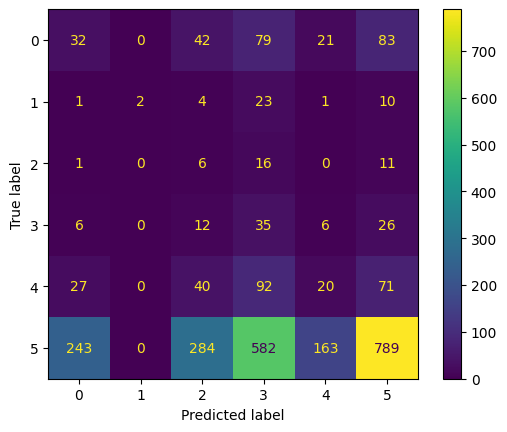

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_lr1 = confusion_matrix(y_val,y_pred_val_lr1)
cmd_lr1 = ConfusionMatrixDisplay(confusion_matrix = cm_lr1)
cmd_lr1.plot()
plt.show()

**2). Logistic Regression with weight = default**

In [ ]:
lr2 = LogisticRegression(random_state = 42, max_iter = 10000) #Have used max_iter as 10000 as lr2 was not able to converge properly

lr2.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
y_pred_val_lr2 = lr2.predict(X_val)
round(accuracy_score(y_val,y_pred_val_lr2),4)

0.7562

Default parameters of Logistic Regression managed to get a 75.62% accuracy with the validation data_set

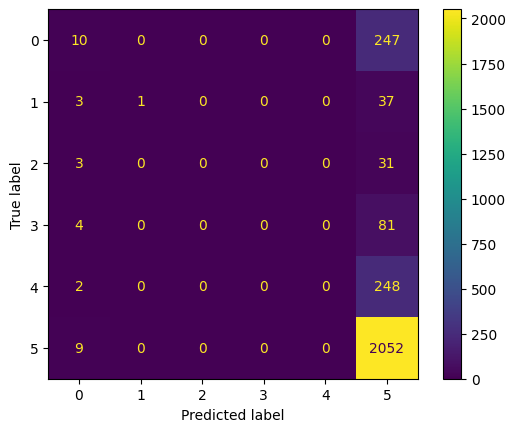

In [ ]:
cm_lr2 = confusion_matrix(y_val,y_pred_val_lr2)
cmd_lr2 = ConfusionMatrixDisplay(confusion_matrix = cm_lr2)
cmd_lr2.plot()
plt.show()

**3). Logistic Regression with Hyperparameter Tuning (L1--Liblinear)**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

lr3_params = {'penalty':['l1','l2'],'solver':['liblinear','saga'],'warm_start':[True,False],'C':[10,100,1000], 'fit_intercept':[True, False]}

lr3 = LogisticRegression(random_state = 42,max_iter = 25000, tol = 0.0001)

random_lr3 = RandomizedSearchCV(lr3, lr3_params, cv = 2)

random_lr3.fit(X_train,y_train)

RandomizedSearchCV(cv=2,
                   estimator=LogisticRegression(max_iter=25000,
                                                random_state=42),
                   param_distributions={'C': [10, 100, 1000],
                                        'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga'],
                                        'warm_start': [True, False]})

In [ ]:
random_lr3.best_params_

{'warm_start': False,
 'solver': 'liblinear',
 'penalty': 'l1',
 'fit_intercept': True,
 'C': 10}

In [ ]:
y_pred_val_lr3 = random_lr3.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_lr3),4)

0.7577

**4). Logistic Regression with Hyperparameter Tuning Elasticnet (alpha = 0.9)**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

lr5 = LogisticRegression(penalty = 'elasticnet',random_state = 42,solver = 'saga',
                         max_iter = 35000,warm_start = True, C = 1000, tol = 0.001, fit_intercept = False)

params_lr5 = {'l1_ratio':[0.9,0.8,0.7,0.6]}

random_lr5 = RandomizedSearchCV(lr5,params_lr5,cv=3, n_iter = 40)

random_lr5.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=40. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(C=1000, fit_intercept=False,
                                                max_iter=35000,
                                                penalty='elasticnet',
                                                random_state=42, solver='saga',
                                                tol=0.001, warm_start=True),
                   n_iter=40,
                   param_distributions={'l1_ratio': [0.9, 0.8, 0.7, 0.6]})

In [ ]:
random_lr5.best_params_

{'l1_ratio': 0.9}

In [ ]:
y_pred_val_lr5 = random_lr5.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_lr5),4)

0.7555

**Summary of Logistic Regression (Standard Scaler)**
1. default parameters, class_weight = 'balanced ||| Accuracy = 0.324
2. default parameters ||| Accuracy = 0.7562
3. penalty = l1, solver = liblinear, tol = default, warm_start = default, fit_intercept = True
   
   C = 1000 ||| Accuracy = 0.7577
   
   C = 100 ||| Accuracy = 0.7577
   
   C = 10 ||| Accuracy = 0.7577
4. penalty = l1, solver = liblinear, C = 1000, fit_intercept = False, warm_start = True
   
   tol = 1 ||| Accuracy = 0.7562
   
   **tol = 0.001 ||| Accuracy = 0.7581**
   
   tol = 0.0001 ||| Accuracy = 0.7581

5. penalty = elasticnet, warm_start = True, fit_intercept = False, C = 1000, tol = 0.001, solver = saga
   
   alpha = 0.9, CV = 2 ||| Accuracy = 0.7555
   
   alpha = 0.9, CV = 4 ||| Accuracy = 0.7555

# **Logistic Regression CV on method-1**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lrcv1 = LogisticRegressionCV(penalty = 'l1',solver = 'liblinear',random_state = 42,
                             max_iter = 1000,cv=10, Cs = 1000, tol = 0.001, fit_intercept = False)

lrcv1.fit(X_train,y_train)

LogisticRegressionCV(Cs=1000, cv=10, fit_intercept=False, max_iter=1000,
                     penalty='l1', random_state=42, solver='liblinear',
                     tol=0.001)

In [ ]:
y_pred_val_lrcv1 = lrcv1.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_lrcv1),4)

0.7581

**Summary of Logistic Regression CV**

penalty = l1, solver = liblinear, fit_intercept = False, Cs = 1000, tol = 0.001

1. CV = 5 ||| Accuracy = 0.7581
2. CV = 10 ||| Accuracy = 0.7581


# **XGBoost on method-1**

**1). XGB on default parameters**

In [ ]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier()

xgb1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_val_xgb1 = xgb1.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_xgb1),4)

0.7614

In [ ]:
y_pred_xgb = xgb1.predict(X_test)

**2). XGB with Hyperparameter tuning**

In [ ]:
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],'min_child_weight': [1, 2, 3],
              'gamma': [0, 0.1, 0.2]}

xgb = XGBClassifier()

random_xgb = RandomizedSearchCV(xgb,param_grid,cv = 2)

random_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [100, 200, 300]})

In [ ]:
random_xgb.best_params_

{'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0.1}

In [ ]:
y_pred_val_xgb2 = random_xgb.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_xgb2),4)

0.7595

**3.) XGB with more Hyperparameter tuning**

In [ ]:
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'learning_rate': [0.0001,0.001,0.01],
              'max_depth': [4, 5,7,10],'min_child_weight': [1, 2, 3],
              'gamma': [0, 0.00001, 0.1]}

xgb = XGBClassifier(n_estimators = 200)

random_xgb2 = RandomizedSearchCV(xgb,param_grid,cv = 3)

random_xgb2.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'gamma': [0, 1e-05, 0.1],
                                        'learning_rate': [0.0001, 0.001, 0.01],
                                        'max_depth': [4, 5, 7, 10],
                                        'min_child_weight': [1, 2, 3]})

In [ ]:
random_xgb2.best_params_

{'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0}

In [ ]:
y_pred_val_xgb3 = random_xgb2.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_xgb3),4)

0.7625

In [ ]:
#y_pred_xgb3 = xgb1.predict(X_test)

**4.) XGB with more Hyperparameter tuning**

In [ ]:
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

xgb4 = XGBClassifier(n_estimators = 200, learning_rate = 0.01, max_depth = 8, gamma = 0.1, min_child_weight = 7)

xgb4.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_val_xgb4 = xgb4.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_xgb4),4)

0.7606

**Summary of XG Boost**
1. Default parameters ||| Accuracy = 0.7614
2. learning_rate = 0.01, max_depth = 5, min_child_weight = 2, n_estimators = 200, gamma = 0 ||| Accuracy = 0.7592
3. **gamma = 0.1, learning_rate = 0.01, max_depth = 7, min_child_weight = 3 ||| Accuracy = 0.7617**
4. gamma = 0.1, learning_rate = 0.01, max_depth = 7, min_child_weight = 7 ||| Accuracy = 0.7606

# **Decision Tree Classifier on Method-1**

**1). Default parameters**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(random_state = 42)
dtc1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_val_dtc1 = dtc1.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_dtc1),4)

0.6283

**2). Decision Tree Classifier with Hyperparameter tuning**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [4,8,12,'sqrt', 'log2', None]
}
from sklearn.model_selection import RandomizedSearchCV
random_dtc1 = RandomizedSearchCV(dtc1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#used n_jobs = -1 in order to increase the program's speed as tthis feature use all CPU cores

random_dtc1.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': [4, 8, 12, 'sqrt',
                                                         'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='accuracy')

In [ ]:
random_dtc1.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 4,
 'max_depth': 5,
 'criterion': 'gini'}

In [ ]:
y_pred_val_dtc2 = random_dtc1.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_dtc2),4)

0.757

**3). Decision Tree Classifier with Hyperparameter tuning**

In [ ]:
dtc2 = DecisionTreeClassifier(random_state = 42, criterion = 'entropy', max_depth = 5,
                              max_features = 8, min_samples_leaf = 4, min_samples_split = 2)

param_grid2 = {'splitter':['random','best'], 'ccp_alpha':[0.0001,0.001,0.01,0.02,0.05],
              'max_leaf_nodes':[None,1,3,5,8,10], 'class_weight':[None, 'balanced']}

from sklearn.model_selection import RandomizedSearchCV
random_dtc2 = RandomizedSearchCV(dtc2, param_grid2, cv=5, scoring='accuracy',n_jobs = -1)
random_dtc2.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validat

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=5, max_features=8,
                                                    min_samples_leaf=4,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0001, 0.001, 0.01, 0.02,
                                                      0.05],
                                        'class_weight': [None, 'balanced'],
                                        'max_leaf_nodes': [None, 1, 3, 5, 8,
                                                           10],
                                        'splitter': ['random', 'best']},
                   scoring='accuracy')

In [ ]:
y_pred_val_dtc3 = random_dtc2.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_dtc3),4)

0.7595

In [ ]:
random_dtc2.best_params_

{'splitter': 'best',
 'max_leaf_nodes': 10,
 'class_weight': None,
 'ccp_alpha': 0.0001}

**4). Decision Tree Classifier with Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc3 = DecisionTreeClassifier(random_state = 42, criterion = 'entropy', max_depth = 5,
                              max_features = 8, min_samples_leaf = 4, min_samples_split = 2, max_leaf_nodes = 8,
                             splitter = 'best')

grid_dtc3 = GridSearchCV(dtc3, {'ccp_alpha':[0.0000001,0.000001,0.00001]},
                        cv=5, return_train_score = True, n_jobs = -1 )

grid_dtc3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              max_features=8, max_leaf_nodes=8,
                                              min_samples_leaf=4,
                                              random_state=42),
             n_jobs=-1, param_grid={'ccp_alpha': [1e-07, 1e-06, 1e-05]},
             return_train_score=True)

In [ ]:
grid_dtc3.best_params_

{'ccp_alpha': 1e-07}

In [ ]:
y_pred_val_dtc4 = grid_dtc3.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_dtc4),4)

0.7595

**Summary of Decision Tree Classifier**

1. Default ||| Accuracy = 0.6283
2. criterion = entropy, max_depth = 5, max_features = 8, min_samples_leaf = 4, min_samples_split = 2 ||| Accuracy = 0.7581
3. Point 2 + ccp_alpha = 0.0001, class_weight = None, max_leaf_nodes = 8, splitter = best ||| Accuracy = 0.7595
4. **Point 2 + Point 3 + ccp_alpha = 1e-07 ||| Accuracy = 0.7595**

# **Model building Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_val_svc1 = svc.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_svc1),4)

0.7555

# **Model building LinearSVC**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV

lsvc_params = {'penalty':['l1','l2'],'loss':['hinge','squared_hinge'],
               'dual':[True,False],'C':[1,0.1,0.01],'fit_intercept':[True,False]}

rand_lsvc = RandomizedSearchCV(LinearSVC(random_state = 42, max_iter = 100000),lsvc_params,cv = 2)

rand_lsvc.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below a

RandomizedSearchCV(cv=2, estimator=LinearSVC(max_iter=100000, random_state=42),
                   param_distributions={'C': [1, 0.1, 0.01],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'penalty': ['l1', 'l2']})

In [ ]:
rand_lsvc.best_params_

{'penalty': 'l2',
 'loss': 'squared_hinge',
 'fit_intercept': False,
 'dual': False,
 'C': 0.01}

In [ ]:
y_pred_val_lsvc1 = rand_lsvc.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_lsvc1),4)

0.7562

**Using the above parameters with fit_intercept = False**

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state = 42, penalty = 'l1',loss = 'squared_hinge',max_iter = 1000,
                 dual = False, fit_intercept = False, C= 0.01)
lsvc.fit(X_train,y_train)

LinearSVC(C=0.01, dual=False, fit_intercept=False, penalty='l1',
          random_state=42)

In [ ]:
y_pred_val_lsvc1 = lsvc.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_lsvc1),4)

0.7584

# **Model building Gradient Boost**

**1. Gradient Boost with default parameters**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad1 = GradientBoostingClassifier()
grad1.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_val_grad1 = grad1.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_grad1),4)

0.7599

**2. Gradient Boost with Hyper Parameter Tuning**

In [ ]:
grad2 = GradientBoostingClassifier(ccp_alpha = 1)
grad2.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=1)

In [ ]:
y_pred_val_grad2 = grad2.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_grad2),4)

0.7555

# **Model building AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier()
ada1.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred_val_ada1 = ada1.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_ada1),4)

0.75

# **Model building K Nearest Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 75,weights = 'distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=75, weights='distance')

In [ ]:
y_pred_val_knn1 = knn.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_knn1),4)

0.7603

# **Model building Radius Nearest Neighbor**

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnn = RadiusNeighborsClassifier(radius = 90.0,weights = 'distance')
rnn.fit(X_train,y_train)

RadiusNeighborsClassifier(radius=90.0, weights='distance')

In [ ]:
y_pred_val_rnn = rnn.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_rnn),4)

0.7592

**This did not worked out so have changed the strategy below.**

# **METHOD-2**

**Summary of accuracy achieved on test data using the following method-2**

XGBoost 0.77826

KNN 0.77166

Linear SVC 0.77034 (fit_intercept = False)

Linear SVC 0.76528 (fit_intercept = True)

# **Method 2 - Using TF-IDF on Recipe_Review column**

In [ ]:
import pandas as pd
import numpy as np

#importing the train dataset
df = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

df.head(2) #identifying the datatypes of variables.

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...


In [ ]:
df.shape

(13636, 15)

In [ ]:
df.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

Recipe_Review has 2 NULL rows, so will be filling them

Filling NULL rows with "very good"

In [ ]:
df = df.fillna("very good")
df.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [ ]:
X1 = df.iloc[:,[0,1,2,7,9,10,11,13]]
Recipe_Review = df['Recipe_Review']
y = df['Rating']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf
tfidf = tf_idf(stop_words = 'english', norm = None)
#Recipe_Review = df['Recipe_Review']
tfidf_matrix = tfidf.fit_transform(Recipe_Review)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df)

        00  000   03   04   05   07   08   10  100  1000mgs  ...  zuc  zucc  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...      ...  ...  ...   ...   
13631  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   
13632  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   
13633  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   
13634  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   
13635  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  ...  0.0   0.0   

       zucchini  zucchinie  zucchinis  zuchiini  zu

**Dimension of the updated matrix**

In [ ]:
X = pd.concat([X1,tfidf_df],axis = 1)
X.shape

(13636, 10202)

In [ ]:
X.head(2)

,ID,RecipeNumber,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,00,000,...,zuc,zucc,zucchini,zucchinie,zucchinis,zuchiini,zuchini,zuchinni,zucs,zuke
0,70,71,12259,20,0,0,0,100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,72,88,8202,1,0,0,1,100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Performing Train-Test-Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.20, random_state = 42)
#considering 20% validation split

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(10908, 10202)
(2728, 10202)
(10908,)
(2728,)


# **XG-Boost on Method 2**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_val_xgb = xgb.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_xgb),4)

0.7757

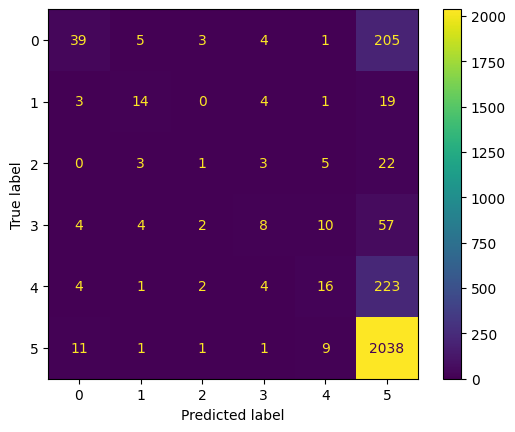

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_xgb = confusion_matrix(y_val,y_pred_val_xgb)
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix = cm_xgb)
cmd_xgb.plot()
plt.show()

We can see in the above Confusion Matrix that how nicely the ratings are splitted across the grid while in method-1, the ratings were specifically focused on rating 5 only.

**Test Data**

In [ ]:
df_test = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


In [ ]:
df_test.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [ ]:
X2 = df_test.iloc[:,[0,1,2,7,9,10,11,12]]
Recipe_Review1 = df_test['Recipe_Review']

In [ ]:
X2.head(2)

,ID,RecipeNumber,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
0,86,45,41384,1,0,0,0,100
1,102,53,3143,1,0,0,1,100


In [ ]:
tfidf_matrix_test = tfidf.transform(Recipe_Review1)
tfidf_df_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df_test)

       00  000   03   04   05   07   08        10  100  1000mgs  ...  zuc  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0.0  ...  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0.0  ...  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0.0  ...  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0.0  ...  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.122379  0.0      0.0  ...  0.0   
...   ...  ...  ...  ...  ...  ...  ...       ...  ...      ...  ...  ...   
4541  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0.0  ...  0.0   
4542  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0.0  ...  0.0   
4543  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0.0  ...  0.0   
4544  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0.0  ...  0.0   
4545  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0.0  ...  0.0   

      zucc  zucchini  zucchinie  zucchinis  zuchiini  zuchini  zuchinni  zu

In [ ]:
X_test = pd.concat([X2,tfidf_df_test],axis = 1)
X_test.shape

(4546, 10202)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

GOT THE ACCURACY OF 0.77826

# **KNN on Method 2**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_val_knn1 = knn.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_knn1),4)

0.7287

**KNN with Hyperparameter Tuning on method 2**

In [ ]:
params_knn = {'n_neighbors':[10,20,30,40,50,60,70,80,90,100],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute'],
              'leaf_size':[30,50,70,100]}

from sklearn.model_selection import RandomizedSearchCV

rsv2 = RandomizedSearchCV(knn,params_knn, cv = 2)

rsv2.fit(X_train,y_train)

RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30, 50, 70, 100],
                                        'n_neighbors': [10, 20, 30, 40, 50, 60,
                                                        70, 80, 90, 100],
                                        'weights': ['uniform', 'distance']})

In [ ]:
y_pred_val_knn2 = rsv2.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_knn2),4)

0.7625

In [ ]:
rsv2.best_params_

{'weights': 'distance',
 'n_neighbors': 60,
 'leaf_size': 100,
 'algorithm': 'kd_tree'}

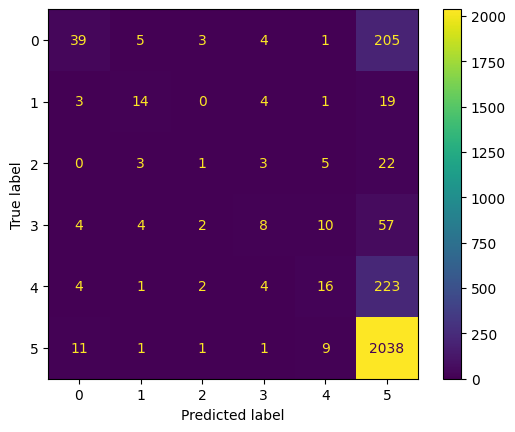

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_knn = confusion_matrix(y_val,y_pred_val_xgb)
cmd_knn = ConfusionMatrixDisplay(confusion_matrix = cm_knn)
cmd_knn.plot()
plt.show()

In [ ]:
y_pred_xgb2 = rsv2.predict(X_test)

In [ ]:
#submission = pd.DataFrame({"ID": range(1,4547),"total_amount": y_pred_xgb2})

#submission.to_csv("submission.csv",index=False)

GOT THE ACCURACY OF 0.77166

# **Linear SVC on Method 2**

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state = 42, max_iter = 50000)
lsvc.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=50000, random_state=42)

In [ ]:
y_pred_val_lsvc = lsvc.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_lsvc),4)

0.6998

**Linear SVC using hyperparameter tuning on Method 2**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'penalty':['l1','l2'],
             'loss':['hinge','squared_hinge'],
             'dual':[True, False],
             'fit_intercept':[True,False],
             'C':[0.1,0.01]}

lsvc1 = LinearSVC(random_state = 42, max_iter = 100000)

grid_lsvc1_m2 = RandomizedSearchCV(lsvc1, parameters, cv=2) #m2 is method2

grid_lsvc1_m2.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

RandomizedSearchCV(cv=2, estimator=LinearSVC(max_iter=100000, random_state=42),
                   param_distributions={'C': [0.1, 0.01], 'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'penalty': ['l1', 'l2']})

In [ ]:
y_pred_val_lsvc0 = grid_lsvc1_m2.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_lsvc0),4)

0.7606

In [ ]:
grid_lsvc1_m2.best_params_

{'penalty': 'l1',
 'loss': 'squared_hinge',
 'fit_intercept': False,
 'dual': False,
 'C': 0.01}

In [ ]:
y_pred_lsvc01 = grid_lsvc1_m2.predict(X_test)

submission = pd.DataFrame({"ID": range(1,4547),"total_amount": y_pred_lsvc01})

submission.to_csv("submission.csv",index=False)

GOT THE ACCURACY OF 0.76528

**Linear SVC using above Hyperparameters on method 2 (fit_intercept = False)**

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state = 42, penalty = 'l1',loss = 'squared_hinge',max_iter = 1000,
                 dual = False, fit_intercept = False, C= 0.01)
lsvc.fit(X_train,y_train)

LinearSVC(C=0.01, dual=False, fit_intercept=False, penalty='l1',
          random_state=42)

In [ ]:
y_pred_val_lsvc1 = lsvc.predict(X_val)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val,y_pred_val_lsvc1),4)

0.7606

In [ ]:
y_pred_lsvc = lsvc.predict(X_test)

In [ ]:
#submission = pd.DataFrame({"ID": range(1,4547),"total_amount": y_pred_lsvc})

#submission.to_csv("submission.csv",index=False)

GOT THE ACCURACY OF 0.77034